# 1. Data Collection and Preparation

## Downloading data, for CoinGecko status error 429 , the coin data needs to be downloaded manually

In [13]:
from app import download_data
download_data()

2024-11-06 21:48:30.585 | INFO     | app:download_data:9 - Starting to download data
2024-11-06 21:48:30.587 | INFO     | lib.data_gecko:run:69 - Download binancecoin data from CoinGecko
2024-11-06 21:48:31.339 | INFO     | lib.data_gecko:run:69 - Download tether data from CoinGecko
2024-11-06 21:48:31.908 | INFO     | lib.data_gecko:run:69 - Download ripple data from CoinGecko
2024-11-06 21:48:32.492 | INFO     | lib.data_gecko:run:69 - Download dogecoin data from CoinGecko
2024-11-06 21:48:33.169 | INFO     | lib.data_gecko:run:69 - Download usd-coin data from CoinGecko
2024-11-06 21:48:33.989 | INFO     | lib.data_gecko:run:69 - Download bitcoin data from CoinGecko
2024-11-06 21:48:34.066 | ERROR    | lib.data_gecko:get_historic_price:54 - CoinGecko status error 429 
2024-11-06 21:48:34.067 | INFO     | lib.data_gecko:run:69 - Download ethereum data from CoinGecko
2024-11-06 21:48:34.131 | ERROR    | lib.data_gecko:get_historic_price:54 - CoinGecko status error 429 
2024-11-06 21:48

# Loading data from data folder and get three data frames
- df1: source data in downloadede format
- df_ret: return datafarme
- df_vol: volatility dataframe

In [14]:
import app

df1 , df_hist_ret, df_vol =app.preprocess_data()

2024-11-06 21:48:38.253 | INFO     | app:preprocess_data:15 - Starting to preprocess data
2024-11-06 21:48:38.255 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - ^TNX
2024-11-06 21:48:38.258 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - SQ
2024-11-06 21:48:38.261 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - ^VIX
2024-11-06 21:48:38.266 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - ^XAU
2024-11-06 21:48:38.270 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - ^IRX
2024-11-06 21:48:38.274 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - RIOT
2024-11-06 21:48:38.277 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - ^TYX
2024-11-06 21:48:38.280 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - NVDA
2024-11-06 21:48:38.283 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - ^FVX
2024-11-06 21:48:38.286 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - SPY
2024-11-06 21:48:38.288

In [15]:
from lib.data_preprocessing import plot_prices_culm_change, plot_volumes, plot_mkt_cap, filter_price_columns

## Asset Return and Standard Dev

In [16]:
df_daily_rets = filter_price_columns(df1)
df_daily_rets.describe()

,bitcoin_prices,usd-coin_prices,tether_prices,solana_prices,chainlink_prices,ripple_prices,ethereum_prices,binancecoin_prices,dogecoin_prices,SQ_Close,RIOT_Close,NVDA_Close,SPY_Close
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,0.003330,0.000003,-0.000003,0.007031,0.000628,-0.000642,0.001952,0.003963,0.004600,0.001904,0.000900,0.004894,0.001170
std,0.034131,0.000943,0.000829,0.055421,0.049149,0.037476,0.040801,0.037083,0.058613,0.028141,0.055613,0.032644,0.007596
min,-0.121338,-0.003549,-0.002583,-0.149025,-0.200369,-0.125822,-0.190282,-0.143726,-0.150760,-0.084384,-0.158199,-0.100046,-0.029124
25%,-0.016521,-0.000478,-0.000451,-0.029265,-0.028861,-0.015888,-0.019628,-0.014728,-0.027072,-0.014748,-0.032815,-0.015466,-0.002179
50%,0.001813,0.000035,-0.000001,0.003291,-0.001848,-0.000489,0.002210,0.002045,0.002835,0.002237,-0.003879,0.005448,0.001152
75%,0.021216,0.000509,0.000435,0.039178,0.030063,0.016299,0.021043,0.021160,0.027444,0.018163,0.032609,0.023496,0.005766
max,0.122669,0.003655,0.003422,0.249453,0.145837,0.198430,0.181006,0.165090,0.312605,0.161271,0.231106,0.164009,0.023117


## Plot volume and market cap and cumulative price change since 1 year ago

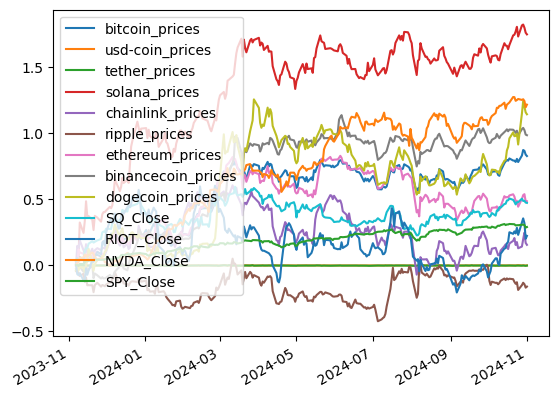

In [17]:

plot_prices_culm_change(df1)

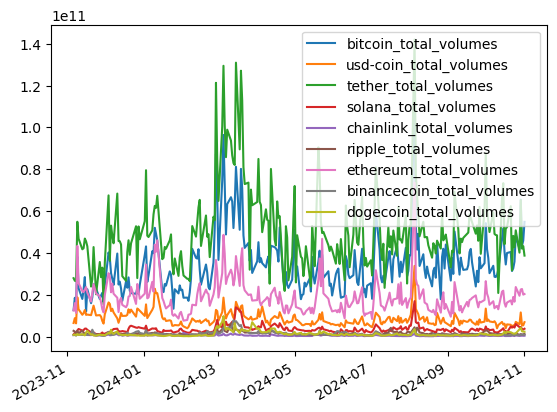

In [18]:
plot_volumes(df1)

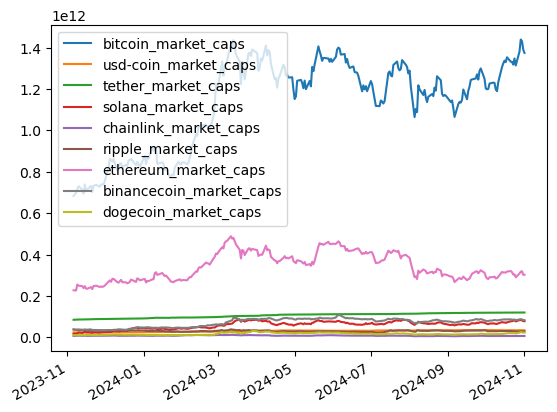

In [19]:
plot_mkt_cap(df1)

## Past 7, 30, 90 and 252 days annualized returns 

In [20]:
df_hist_ret

,7,30,90,252
bitcoin,0.839085,0.839085,0.839085,0.839085
usd-coin,0.000677,0.000677,0.000677,0.000677
tether,-0.000863,-0.000863,-0.000863,-0.000863
solana,1.771801,1.771801,1.771801,1.771801
chainlink,0.158361,0.158361,0.158361,0.158361
ripple,-0.161833,-0.161833,-0.161833,-0.161833
ethereum,0.491939,0.491939,0.491939,0.491939
binancecoin,0.998717,0.998717,0.998717,0.998717
dogecoin,1.159272,1.159272,1.159272,1.159272
SQ,0.479854,0.479854,0.479854,0.479854


## Past 7, 30, 90 and 252 days annualized volatility 

In [21]:
df_vol

,7,30,90,252
bitcoin,0.500042,0.388941,0.542070,0.541811
usd-coin,0.018012,0.010916,0.011115,0.014967
tether,0.018590,0.012004,0.013310,0.013163
solana,0.816051,0.642046,0.793566,0.879777
chainlink,0.780562,0.607448,0.776257,0.780223
ripple,0.502222,0.429770,0.680345,0.594913
ethereum,0.624663,0.501753,0.678695,0.647703
binancecoin,0.466979,0.426450,0.553160,0.588681
dogecoin,1.721229,0.973470,0.885360,0.930454
SQ,0.240539,0.274898,0.369910,0.446725


## Sanity check sharpe ratio

In [22]:
df_ret/df_vol

,7,30,90,252
bitcoin,1.678031,2.157357,1.547928,1.548667
usd-coin,0.037561,0.061976,0.060868,0.045202
tether,-0.046400,-0.071856,-0.064807,-0.065532
solana,2.171188,2.759618,2.232709,2.013922
chainlink,0.202881,0.260699,0.204006,0.202969
ripple,-0.322234,-0.376558,-0.237870,-0.272029
ethereum,0.787527,0.980440,0.724831,0.759513
binancecoin,2.138675,2.341933,1.805476,1.696533
dogecoin,0.673514,1.190865,1.309379,1.245921
SQ,1.994911,1.745570,1.297220,1.074160
